In [522]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import numpy as np

In [523]:
df2 = pd.read_csv('Marketing_Campaign - CW2.csv', sep=';')
current_year = datetime.now().year
df2['Age'] = current_year - df2['Year_Birth']
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [524]:
Necessary_cols = ['Age', 'Income', 'MntWines', 'MntFruits', 
                 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds']

df2_cols = df2[Necessary_cols]
df2_cols

,Age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,68,58138.0,635,88,546,172,88,88
1,71,46344.0,11,1,6,2,1,6
2,60,71613.0,426,49,127,111,21,42
3,41,26646.0,11,4,20,10,3,5
4,44,58293.0,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...
2235,58,61223.0,709,43,182,42,118,247
2236,79,64014.0,406,0,30,0,0,8
2237,44,56981.0,908,48,217,32,12,24
2238,69,69245.0,428,30,214,80,30,61


## Calculate Descriptive Statistics

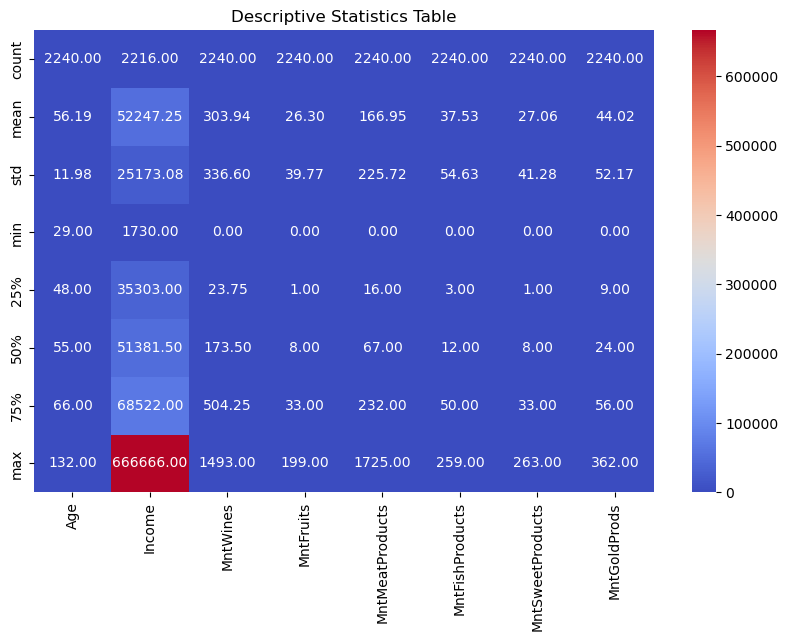

In [526]:
descriptives = df2_cols.describe()

plt.figure(figsize=(10, 6))
sns.heatmap(descriptives, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Descriptive Statistics Table')
plt.show()

## Creating Histograms

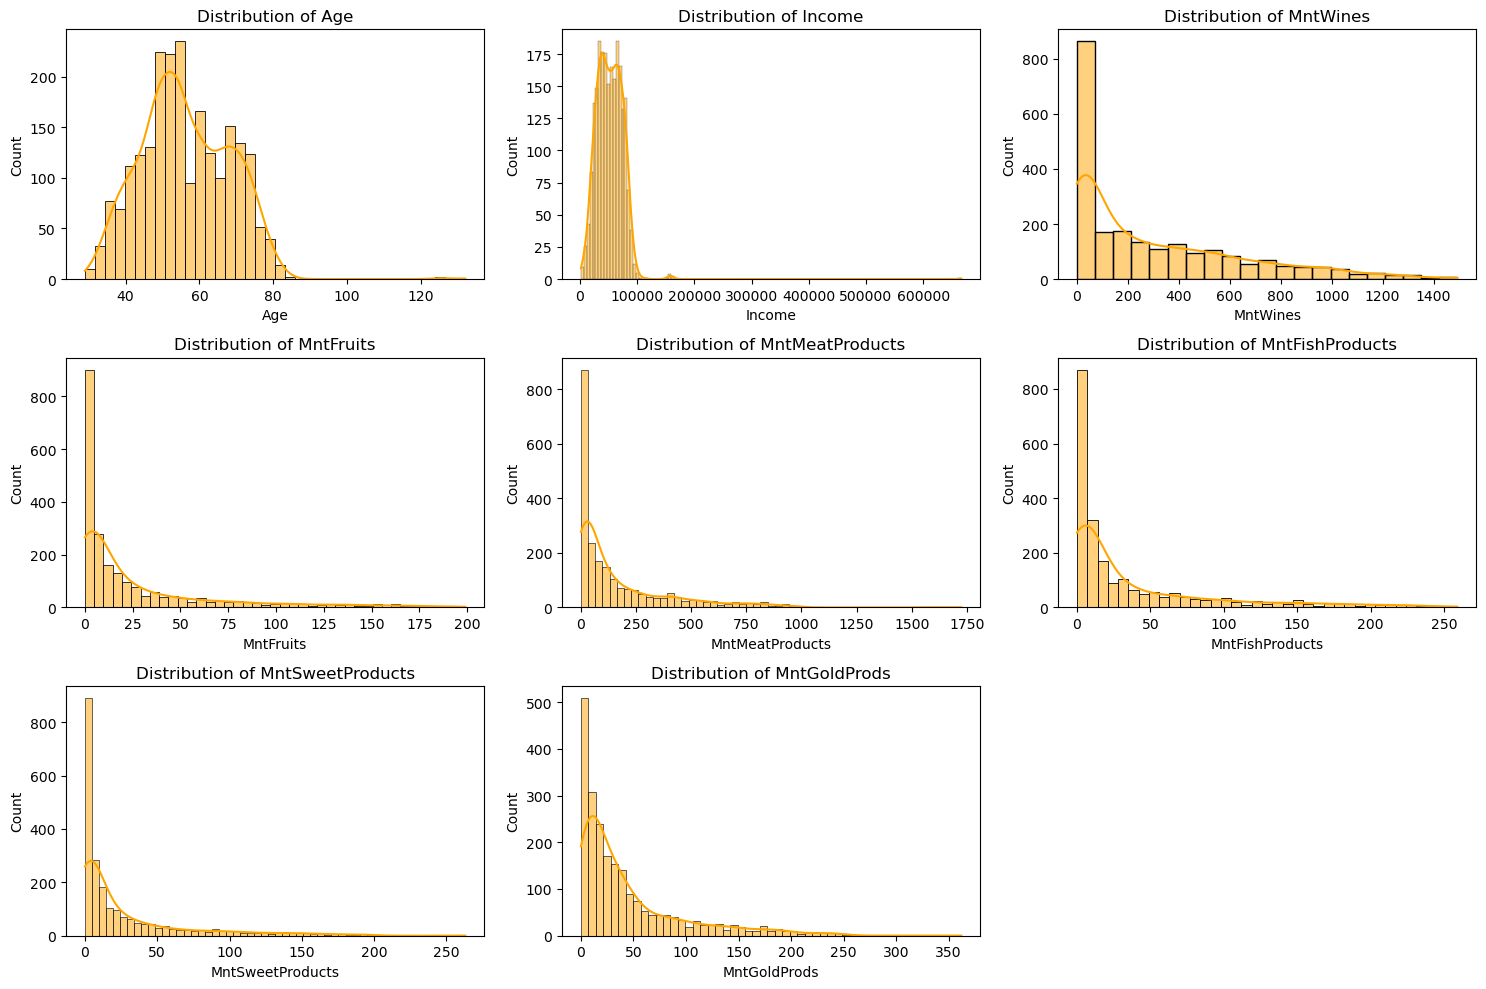

In [528]:
plt.figure(figsize=(15,10))

for i, col in enumerate(Necessary_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[col], kde=True, color='orange')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

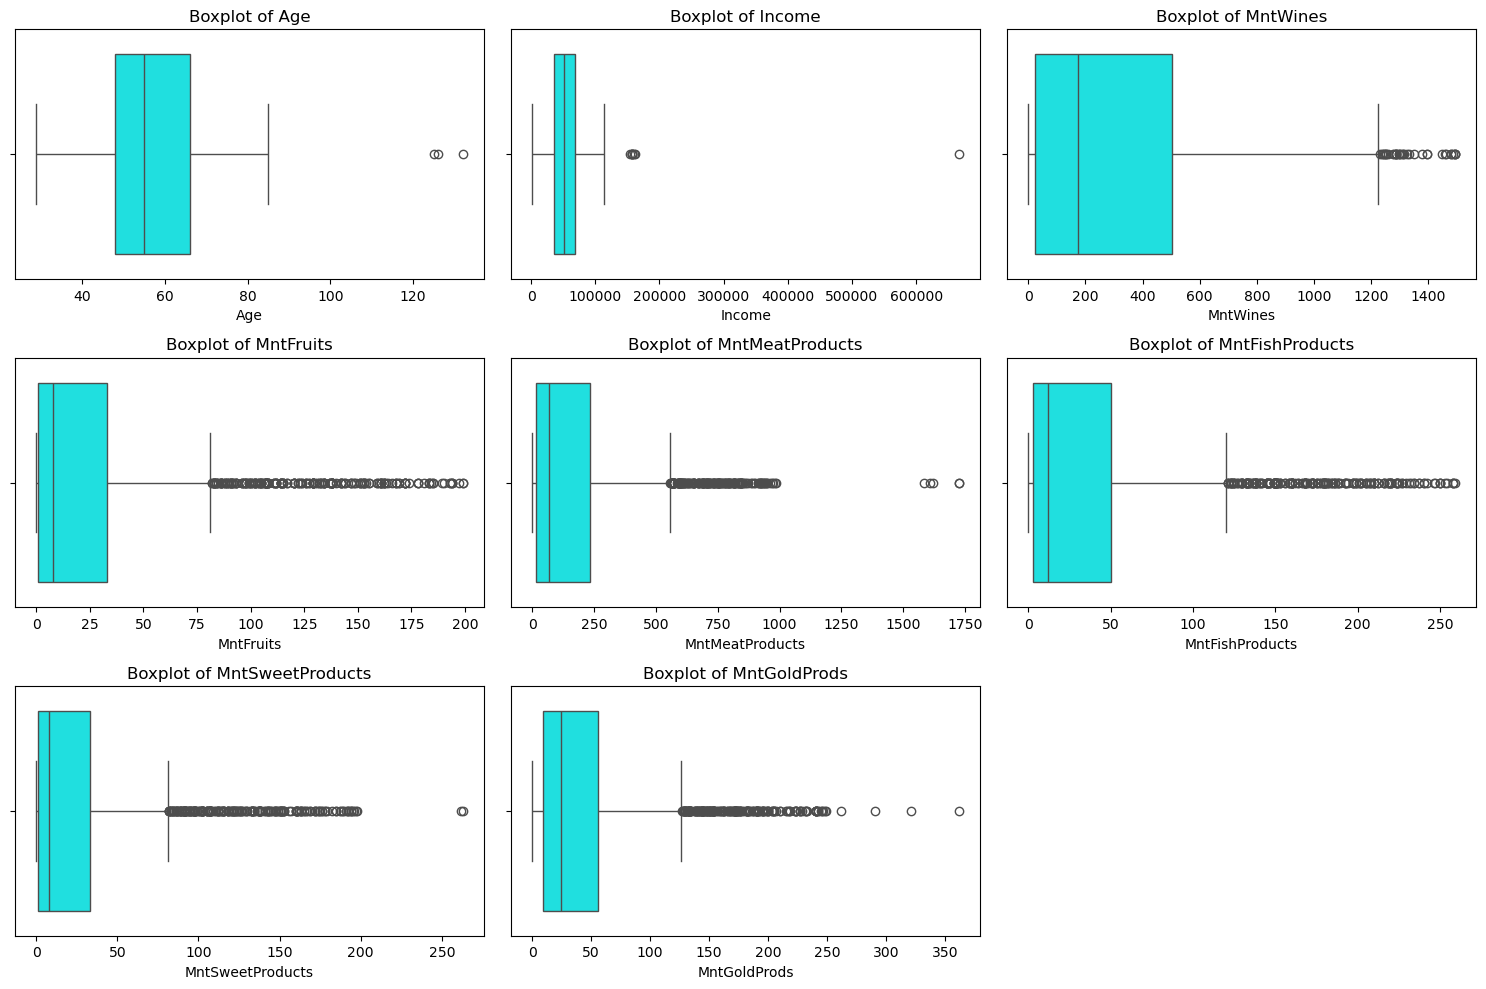

In [529]:
plt.figure(figsize=(15,10))

for i, col in enumerate(Necessary_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df2[col], color='cyan')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Missing Values Identification & Handling

In [531]:
missing = df2_cols.isnull().sum()
print(missing)

Age                  0
Income              24
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
dtype: int64


In [532]:
df2_cols.loc[:, 'Income'] = df2_cols['Income'].fillna(df2_cols['Income'].median())

## Outliers Identification & Handling

In [534]:
for col in df2_cols:
    Q1 = df2_cols[col].quantile(0.25)
    Q3 = df2_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2_cols[(df2_cols[col] < lower_bound) | (df2_cols[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Age: 3 outliers
Income: 8 outliers
MntWines: 35 outliers
MntFruits: 227 outliers
MntMeatProducts: 175 outliers
MntFishProducts: 223 outliers
MntSweetProducts: 248 outliers
MntGoldProds: 207 outliers


In [535]:
df2_cols_cleaned = df2_cols.copy()

for col in df2_cols_cleaned:
    Q1 = df2_cols_cleaned[col].quantile(0.25)
    Q3 = df2_cols_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df2_cols_cleaned = df2_cols_cleaned[(df2_cols_cleaned[col] >= lower_bound) & (df2_cols_cleaned[col] <= upper_bound)]

print(f"Data size after removing outliers: {df2_cols_cleaned.shape}")

Data size after removing outliers: (1258, 8)


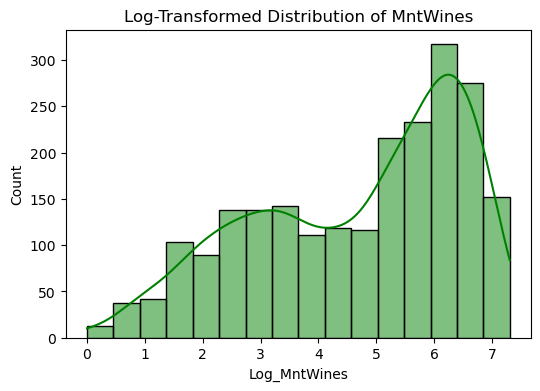

In [536]:
df2_cols = df2_cols.copy()
df2_cols['Log_MntWines'] = np.log1p(df2_cols['MntWines'])

plt.figure(figsize=(6,4))
sns.histplot(df2_cols['Log_MntWines'], kde=True, color='green')
plt.title('Log-Transformed Distribution of MntWines')
plt.show()

## Create New Variable

In [539]:
Necessary_cols_Q2 = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth']

df2_cols_Q2 = df2[Necessary_cols_Q2].copy()
df2_cols_Q2.head()

,Age,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,68,58138.0,0,0,58,8,10,4,7
1,71,46344.0,1,1,38,1,1,2,5
2,60,71613.0,0,0,26,8,2,10,4
3,41,26646.0,1,0,26,2,0,4,6
4,44,58293.0,1,0,94,5,3,6,5


In [540]:
df2_cols_Q2['TotalMnt'] = df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']

In [541]:
missing = df2_cols_Q2.isnull().sum()
print(missing)

df2_cols_Q2['Income'] = df2_cols_Q2['Income'].fillna(df2_cols_Q2['Income'].median())
missing_New = df2_cols_Q2.isnull().sum()
print(missing_New)

Age                     0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
TotalMnt                0
dtype: int64
Age                    0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
TotalMnt               0
dtype: int64


## Checking Multicollinearity

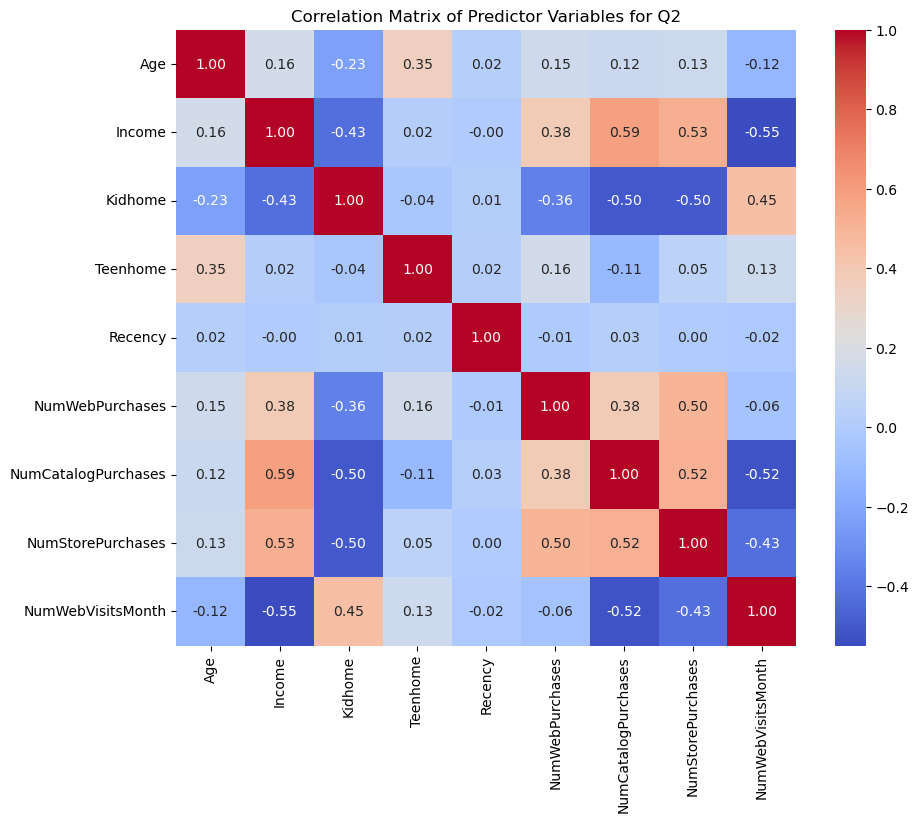

In [543]:
corr_matrix_Q2 = df2_cols_Q2[['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                               'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                               'NumWebVisitsMonth']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_Q2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables for Q2')
plt.show()

## Fitting the Multiple Linear Regression Model

In [545]:
X_Q2 = df2_cols_Q2[['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                    'NumWebVisitsMonth']]
y_Q2 = df2_cols_Q2['TotalMnt']

X_Q2 = sm.add_constant(X_Q2)

model_Q2 = sm.OLS(y_Q2, X_Q2).fit()

print(model_Q2.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalMnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     823.0
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        03:10:18   Log-Likelihood:                -15876.
No. Observations:                2240   AIC:                         3.177e+04
Df Residuals:                    2230   BIC:                         3.183e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -152.2770    

## Assessing Model Assumptions

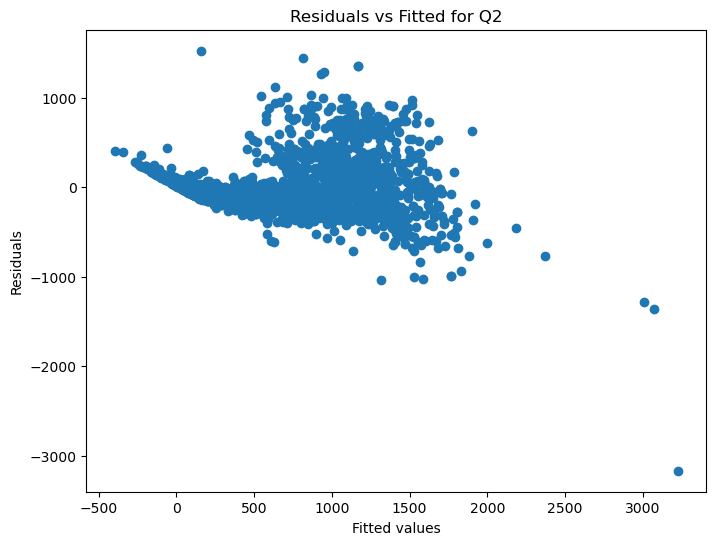

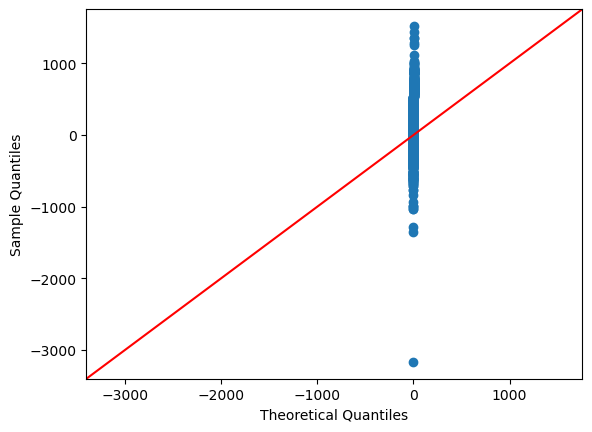

In [547]:
plt.figure(figsize=(8,6))
plt.scatter(model_Q2.fittedvalues, model_Q2.resid)
plt.title('Residuals vs Fitted for Q2')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

sm.qqplot(model_Q2.resid, line ='45')
plt.show()

In [548]:
print("Regression Coefficients for Q2:")
print(model_Q2.params)

Regression Coefficients for Q2:
const                 -152.277004
Age                      0.093136
Income                   0.004741
Kidhome               -102.414249
Teenhome              -149.874741
Recency                  0.313612
NumWebPurchases         33.977912
NumCatalogPurchases     86.068772
NumStorePurchases       43.308434
NumWebVisitsMonth       -1.418572
dtype: float64


In [549]:
print("P-values of Predictors for Q2:")
print(model_Q2.pvalues)

P-values of Predictors for Q2:
const                   9.150870e-04
Age                     8.692681e-01
Income                  2.237699e-41
Kidhome                 3.202067e-12
Teenhome                6.324888e-32
Recency                 1.395228e-01
NumWebPurchases         2.578503e-32
NumCatalogPurchases    8.072125e-158
NumStorePurchases       1.534682e-58
NumWebVisitsMonth       6.859762e-01
dtype: float64


In [550]:
print("R-squared for Q2:", model_Q2.rsquared)

R-squared for Q2: 0.7685948590036547


In [552]:
Necessary_cols_Q3 = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth', 'Response']

df2_cols_Q3 = df2[Necessary_cols_Q3].copy()
df2_cols_Q3

,Age,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,68,58138.0,0,0,58,8,10,4,7,1
1,71,46344.0,1,1,38,1,1,2,5,0
2,60,71613.0,0,0,26,8,2,10,4,0
3,41,26646.0,1,0,26,2,0,4,6,0
4,44,58293.0,1,0,94,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...
2235,58,61223.0,0,1,46,9,3,4,5,0
2236,79,64014.0,2,1,56,8,2,5,7,0
2237,44,56981.0,0,0,91,2,3,13,6,0
2238,69,69245.0,0,1,8,6,5,10,3,0


## Checking for missing values

In [554]:
missing_Q3 = df2_cols_Q3.isnull().sum()
print(missing_Q3)

df2_cols_Q3['Income'] = df2_cols_Q3['Income'].fillna(df2_cols_Q3['Income'].median())

missing_Q3_after = df2_cols_Q3.isnull().sum()
print(missing_Q3_after)

Age                     0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
dtype: int64
Age                    0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
dtype: int64


## Checking Multicolinearity

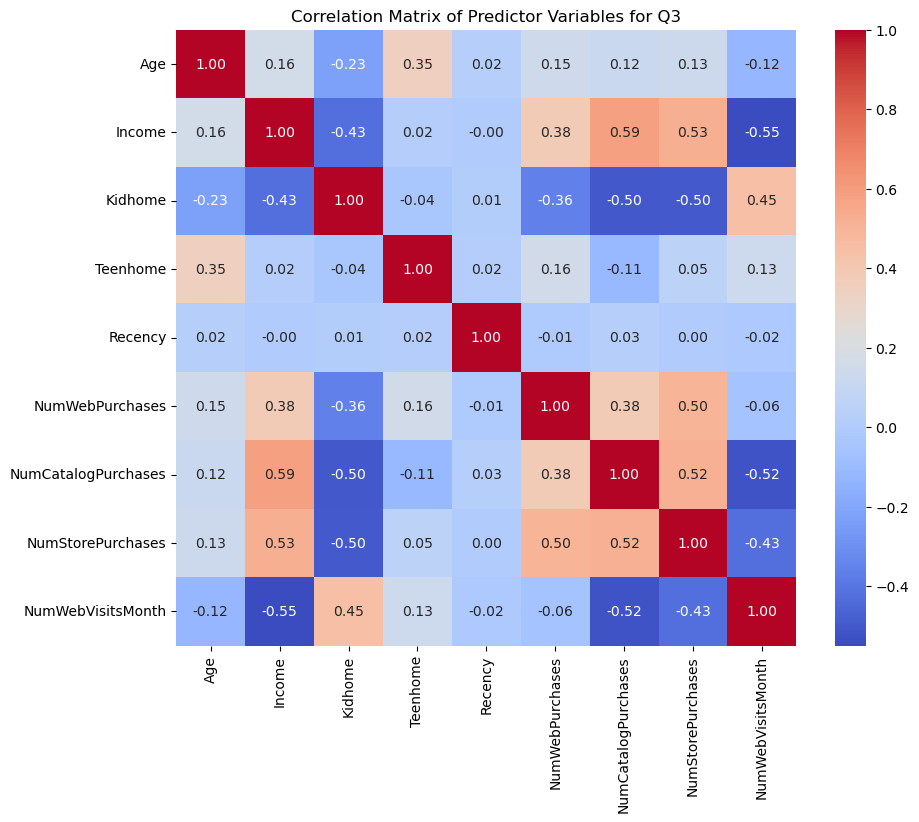

In [556]:
corr_matrix_Q3 = df2_cols_Q3.drop(columns=['Response']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_Q3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables for Q3')
plt.show()

## Checking Variance Inflation Factor

In [558]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_Q3_const = add_constant(df2_cols_Q3.drop(columns=['Response']))

vif_data = pd.DataFrame()
vif_data["Variable"] = X_Q3_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_Q3_const.values, i) for i in range(X_Q3_const.shape[1])]

print(vif_data)

              Variable        VIF
0                const  55.924088
1                  Age   1.221595
2               Income   1.979211
3              Kidhome   1.645075
4             Teenhome   1.240208
5              Recency   1.003298
6      NumWebPurchases   1.638045
7  NumCatalogPurchases   1.990022
8    NumStorePurchases   1.907719
9    NumWebVisitsMonth   1.925427


## Checking & Removing Outliers

In [560]:
for col in df2_cols_Q3.drop(columns=['Response']):
    Q1 = df2_cols_Q3[col].quantile(0.25)
    Q3 = df2_cols_Q3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df2_cols_Q3[(df2_cols_Q3[col] < lower_bound) | (df2_cols_Q3[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Age: 3 outliers
Income: 8 outliers
Kidhome: 0 outliers
Teenhome: 0 outliers
Recency: 0 outliers
NumWebPurchases: 4 outliers
NumCatalogPurchases: 23 outliers
NumStorePurchases: 0 outliers
NumWebVisitsMonth: 8 outliers


In [561]:
df2_cols_Q3_cleaned = df2_cols_Q3.copy()

for col in df2_cols_Q3.drop(columns=['Response']):
    Q1 = df2_cols_Q3[col].quantile(0.25)
    Q3 = df2_cols_Q3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df2_cols_Q3_cleaned = df2_cols_Q3_cleaned[(df2_cols_Q3_cleaned[col] >= lower_bound) & (df2_cols_Q3_cleaned[col] <= upper_bound)]

print(f"Data size after removing outliers: {df2_cols_Q3_cleaned.shape}")

Data size after removing outliers: (2197, 10)


## Feature Scaling

In [563]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Q3_scaled = scaler.fit_transform(df2_cols_Q3_cleaned.drop(columns=['Response']))

df2_cols_Q3_scaled = pd.DataFrame(X_Q3_scaled, columns=df2_cols_Q3_cleaned.drop(columns=['Response']).columns)

df2_cols_Q3_scaled['Response'] = df2_cols_Q3_cleaned['Response'].values

df2_cols_Q3_scaled.head()

,Age,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1.021738,0.322722,-0.831850,-0.937332,0.307465,1.500836,2.811292,-0.569211,0.736725,1
1,1.278605,-0.259163,1.021674,0.899705,-0.383620,-1.172784,-0.592313,-1.188759,-0.141509,0
2,0.336760,0.987544,-0.831850,-0.937332,-0.798271,1.500836,-0.214135,1.289432,-0.580625,0
3,-1.290063,-1.231011,1.021674,-0.937332,-0.798271,-0.790838,-0.970491,-0.569211,0.297608,0
4,-1.033196,0.330370,1.021674,-0.937332,1.551418,0.354999,0.164044,0.050336,-0.141509,0


## Fitting the Logistic Regression Model

In [565]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_Q3 = df2_cols_Q3_scaled.drop(columns=['Response'])
y_Q3 = df2_cols_Q3_scaled['Response']

X_train, X_test, y_train, y_test = train_test_split(X_Q3, y_Q3, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

## Model Evaluation

Accuracy: 0.8757575757575757
Confusion Matrix:
[[559  11]
 [ 71  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       570
           1       0.63      0.21      0.32        90

    accuracy                           0.88       660
   macro avg       0.76      0.60      0.62       660
weighted avg       0.85      0.88      0.85       660



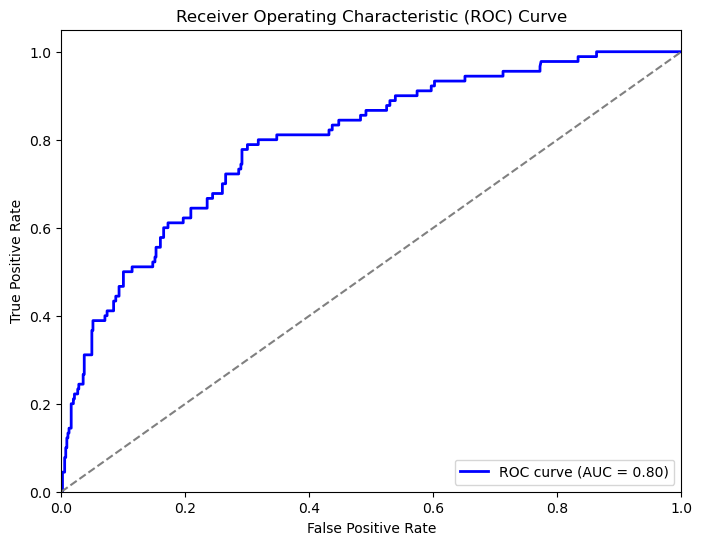

AUC: 0.7967738791423002


In [567]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1 (accepted)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc}")

## Getting Model Coefficients

In [569]:
coefficients = pd.DataFrame(logreg.coef_[0], X_Q3.columns, columns=['Coefficient'])
print("Coefficients for Q3:")
print(coefficients)

Coefficients for Q3:
                     Coefficient
Age                     0.001399
Income                  0.768792
Kidhome                -0.051330
Teenhome               -0.742661
Recency                -0.671543
NumWebPurchases         0.168285
NumCatalogPurchases     0.708044
NumStorePurchases      -0.566108
NumWebVisitsMonth       0.874860


## Comparing Model Performance to a Baseline Model

In [571]:
y_pred_baseline = [0] * len(y_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {baseline_accuracy}")

print("Confusion Matrix for Baseline:")
print(confusion_matrix(y_test, y_pred_baseline))

print("Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0))

Baseline Model Accuracy: 0.8636363636363636
Confusion Matrix for Baseline:
[[570   0]
 [ 90   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       570
           1       0.00      0.00      0.00        90

    accuracy                           0.86       660
   macro avg       0.43      0.50      0.46       660
weighted avg       0.75      0.86      0.80       660

